
### Data Cookbook

Meron Semere

### Welcome to my data cookbook!

This collection includes a set of practical recipes I have developed over the semester. Each one walks through a key step in the data science process such as importing libraries, reading data files, cleaning and wrangling data, merging dataframes, creating visualizations, and sorting numerical values.

I hope you find these examples helpful and easy to follow.

Below are some of the core Python packages commonly used in data science workflows:

In [31]:
# import necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pandas is a package that organizes data into tidy tables called dataframes. You can easily sort, filter, and group your data based on any information you want using pandas.


Numpy handles the heavy lifting of numerical operations, crunching numbers and performing calculations. You can calculate averages, sums and more using numpy.


Matplotlib.pyplot allows you to make visualizations, making it a creative tool to tell communicate your data visually. You can make line charts, bar chats, scatter plots and more using matplot lib. It is important to note that matplotlib.pyplot is not the only resource available for data visceralizations. Seaborn is another popular one, and even pandas has some extensions like 'geopandas' that can visualize data onto real-world maps.

Here are some references to learn more about the imported packages:



*  https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
*  https://numpy.org/
*  https://pandas.pydata.org/docs/user_guide/index.html
*  https://seaborn.pydata.org/tutorial/introduction.html



Now, it is time to import our data. We can do this using the pandas .read_csv() function. This function only works on csv files, but pandas has the ability to read many different types of files.

In [2]:
# Load the dataset
file_path = "/content/historical-death-rates-from-each-cause-category-in-france.csv"
df = pd.read_csv(file_path)

The .head() function lets you preview the first few rows of a dataframe, which is useful for getting a quick overview of the data. By default, it shows the first 5 rows, but you can specify a different number by adding a value inside the parentheses. For example, .head(10) will display the first 10 rows. In this case, I chose .head(10) to get a broader snapshot of the dataset while keeping it manageable to read.

In [3]:
# Display the first few rows of the dataset to verify data is correctly loaded
df.head(10)

,Entity,Code,Year,Congenital anomalies_both sexes_age_all ages,Diseases of the blood and blood-forming organs_both sexes_age_all ages,Neoplasms_both sexes_age_all ages,Diseases of the circulatory system_both sexes_age_all ages,Certain conditions originating in the perinatal period_both sexes_age_all ages,Diseases of the digestive system_both sexes_age_all ages,Diseases of the genitourinary system_both sexes_age_all ages,Infectious and parasitic diseases_both sexes_age_all ages,Injury and poisoning_both sexes_age_all ages,Mental disorders_both sexes_age_all ages,Diseases of the respiratory system_both sexes_age_all ages,Symptoms signs and ill-defined conditions_both sexes_age_all ages
0,France,FRA,1925,1.06,2.59,84.92,492.32,20.43,84.70,57.40,241.21,137.87,6.82,315.03,490.31
1,France,FRA,1926,1.15,2.82,95.50,488.44,22.98,93.92,64.04,256.30,133.80,7.18,333.23,458.15
2,France,FRA,1927,1.18,3.42,106.87,469.90,23.55,94.03,70.63,261.04,120.55,7.33,395.70,365.97
3,France,FRA,1928,1.42,3.48,108.01,473.02,24.37,97.12,73.03,260.45,123.15,7.44,343.44,361.02
4,France,FRA,1929,1.87,3.73,108.23,523.44,25.10,98.74,79.84,260.65,132.22,7.58,437.21,393.00
5,France,FRA,1930,1.65,3.17,109.45,471.53,21.49,88.93,84.44,244.77,136.33,7.63,317.90,309.43
6,France,FRA,1931,1.08,3.34,110.43,490.71,20.47,87.06,84.69,234.68,130.57,6.96,355.47,341.67
7,France,FRA,1932,1.25,3.61,110.90,478.80,23.68,88.24,83.20,225.14,133.98,6.92,308.87,322.39
8,France,FRA,1933,1.04,3.56,109.87,486.05,21.57,86.01,82.53,215.41,133.44,6.65,325.58,333.83
9,France,FRA,1934,1.05,3.29,108.08,476.06,24.60,87.37,80.46,210.40,139.04,7.17,276.64,323.34


I like to begin by exploring the dataset to get a sense of what we're working with and the **head ()**function is a great way to do that. This particular dataset presents historical death rates in France throughout the 20th century, categorized by different causes of death. I chose to work with it because it provides a long-term view of public health trends and makes it possible to see how patterns of mortality have changed over time. It’s also a great example of how data can help us better understand broader societal shifts, including the effects of medical advancements, public policy, and living conditions.

## Recipe #1: How to Find the Top Category in the Latest Year of a Time Series Dataset


**What this recipe does:**

This code helps you identify the category (in this case, the cause of death) with the highest recorded value in the most recent year available in your dataset. This method is useful in many time series datasets when you're trying to find the most recent top performer, issue, or trend.

Finds the latest year in the dataset using the **max() function**.

**latest_year** displays the most recent year. In this case, 1999.

In [25]:
# First, find the most recent year in the dataset
latest_year = df['Year'].max()

In [27]:
latest_year

1999

Filters the data to only include that most recent year. This allows us to later find the deadliest cause by narrowing the data to one year.

In [28]:
# Filter the data to only include that year
recent_data = df[df['Year'] == latest_year]

Uses the **drop()** function to remove the "Year" column leaving only the causes of death and their corresponding death rates.

In [29]:
# Drop the 'Year' column so we’re only looking at causes of death
recent_causes = recent_data.drop(columns='Year')

* **recent_causes.T**

The **.T** stands for transpose. It flips the DataFrame so that the column names (causes of death) become the rows, and the values (death rates) become a single column. This makes it easier to sort and compare them.

* **.sort_values(by=recent_data.index[0], ascending=False)**
    * **sort_values()**
      sorts the rows based on the values in the specified column (in this case, the column created after transposing).
    * **by=recent_data.index[0**]
      tells it to sort using the values from the only row in recent_causes (the most recent year).
    * **ascending=False**
      means it will sort from highest to lowest, so the top cause appears first.
* **.head(1)**
  This selects just the top row, the cause of death with the highest death rate in that year.

* **print("Deadliest cause in", latest_year, "was:")**
  
  Displays the year in a readable sentence.

* **print(deadliest_cause)**

  Shows the name of the deadliest cause and its corresponding death rate.

In [30]:
# Find the cause with the highest death rate
deadliest_cause = recent_causes.T.sort_values(by=recent_data.index[0], ascending=False).head(1)
print("Deadliest cause in", latest_year, "was:")
print(deadliest_cause)

Deadliest cause in 1999 was:
                                                        74
Diseases of the circulatory system_both sexes_a...  219.55


**Tip:**

This same approach can be used on any time series dataset. Whether you're finding the most popular product the most reported crime in the latest year. Just adjust the column names to match your dataset!

## Recipe #2: How to Merge Two Datasets

In this recipe, we’ll explore how to filter a dataset using examples from Project 3. In that project, we worked with institutional research data from Whitman College which included three datasets:
*   course grades
*   majors
*   demographics


In [33]:
# Load the datasets
courses_grades = pd.read_excel("/content/Grades-2002-2018_masked.xlsx")
demographics = pd.read_excel("/content/Outcomes-2002-2018_masked-1.xlsx")
majors_abbr = pd.read_excel("/content/Majors Titles and CIP Codes.xlsx")

Before merging, it's helpful to use **.info()** to examine the structure of each dataset. This lets us confirm that both DataFrames, courses_grades and demographics share a common column, "Student ID" in which we can use as the key for merging. Checking this helps avoid errors and ensures the datasets align.

In [42]:
courses_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75805 entries, 0 to 75804
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         75805 non-null  int64  
 1   Term               75805 non-null  object 
 2   Academic Division  75805 non-null  int64  
 3   Subject            75805 non-null  object 
 4   Course Number      75805 non-null  object 
 5   Credits            75805 non-null  int64  
 6   Grade              63869 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 4.0+ MB


In [43]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6766 entries, 0 to 6765
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Student ID        6766 non-null   int64         
 1   Start Term        6766 non-null   object        
 2   End Date          5546 non-null   datetime64[ns]
 3   Gender            6764 non-null   object        
 4   Races             5930 non-null   object        
 5   Ethnicity         6257 non-null   object        
 6   First Generation  6764 non-null   object        
 7   Major 1           4522 non-null   object        
 8   Major 2           397 non-null    object        
 9   Major 3           1 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 528.7+ KB


This recipe shows how to combine two datasets that share a common column. In this case, "Student ID". Merging datasets is an important part of data wrangling, especially when different pieces of information (like grades and demographics) are stored in separate files.


*   **pd.merge(...)**

  Combines two DataFrames. In this case the two data frames are courses_grades and demographics.
*   **on="Student ID"**
  
  Specifies that the merge should be based on the "Student ID" column which is common to both datasets.
*   **how="inner"**
  
  Keeps only the rows where "Student ID" exists in both DataFrames.This ensures we’re only analyzing students who appear in both the grades and demographics data.

In [35]:
# Merge datasets on Student ID and keep only matching records
student_information = pd.merge(courses_grades, demographics, on="Student ID", how="inner")

After merging, we now have a single DataFrame that combines course grades with student demographic data using the shared key "Student ID". This merged dataset, called student_information, includes both academic and background information for each student. With everything in one place, we can now explore patterns across variables such as major, subject, GPA, gender, and more.

In [38]:
student_information

,Student ID,Term,Academic Division,Subject,Course Number,Credits,Grade,Start Term,End Date,Gender,Races,Ethnicity,First Generation,Major 1,Major 2,Major 3
0,350787,2004FA,2,MUS,2xx,1,4.0,2004FA,2007-06-18,F,WH,NHS,N,NaN,NaN,NaN
1,350787,2004FA,4,GENS,1xx,4,3.7,2004FA,2007-06-18,F,WH,NHS,N,NaN,NaN,NaN
2,350787,2004FA,3,MATH,1xx,3,3.0,2004FA,2007-06-18,F,WH,NHS,N,NaN,NaN,NaN
3,350787,2004FA,2,JPNS,1xx,4,3.7,2004FA,2007-06-18,F,WH,NHS,N,NaN,NaN,NaN
4,350787,2004FA,3,GEOL,1xx,4,3.0,2004FA,2007-06-18,F,WH,NHS,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74496,341705,2018SP,1,POL,1xx,4,NaN,2018SP,NaT,M,WH,NHS,N,NaN,NaN,NaN
74497,341705,2018SP,1,POL,2xx,4,NaN,2018SP,NaT,M,WH,NHS,N,NaN,NaN,NaN
74498,341705,2018SP,1,SSRA,2xx,1,NaN,2018SP,NaT,M,WH,NHS,N,NaN,NaN,NaN
74499,341705,2018SP,4,GENS,1xx,4,NaN,2018SP,NaT,M,WH,NHS,N,NaN,NaN,NaN


**Tip:**

This merging method works anytime you have two datasets that share a common identifier. Whether you're combining:

*   sales data with customer profiles using "Customer ID"
*   survey responses with participant details using "Respondent ID"
*   product details with transactions using "Product ID"

You can follow the same process:
*   inspect with .info()
*   confirm the shared key
*   merge using pd.merge()

## Recipe #3: Counting Unique Values with Two Different Methods

The goal of this recipe is to find which majors were awarded to 200 or more students. We’ll explore two different ways to answer this question: one using .value_counts() for a quick summary and the other using .groupby() with .size() for more flexibility when working with grouped data.

### Approach #1:

*   **.value_counts()**

      counts how many students received each major.

*   The second line filters that list to only show majors that were awarded to 200 or more students.
*   **degrees_awarded_more_than200**
      
      This is your final result, a list of majors that were the most common at Whitman College.




In [48]:
#Degrees that were awarded to at least 200
Majors_count = student_information['Major 1'].value_counts()
degrees_awarded_more_than200_v1 = Majors_count[Majors_count >= 200]
degrees_awarded_more_than200_v1

,count
Major 1,
BIOL,5100
PSYC,4151
POL,3215
BBMB,3006
ENGL,2978
ECON,2967
HIST,2338
SOC,1841
PHIL,1637


In [49]:
biol_count_v1 = degrees_awarded_more_than200[degrees_awarded_more_than200.index == 'BIOL']
print(biol_count_v1)

Major 1
BIOL    5100
Name: count, dtype: int64


### Approach #2:
*   **.groupby('Major 1')**

  groups the data by major
*   **.size()**
  
  counts how many students are in each group
*   Then we filter to keep only majors that have 200 or more students.



In [50]:
# Group by major and count, then filter
Majors_grouped = student_information.groupby('Major 1').size()
degrees_awarded_more_than200_v2 = majors_grouped[majors_grouped >= 200]
print(degrees_awarded_more_than200_v2)

Major 1
ANTH     1098
ART      1589
ART.V     763
ASNS      664
BBMB     3006
BI.EN    1084
BIOL     5100
CHEM     1565
CLAS      328
EC.EN     348
EC.MA     546
ECON     2967
EN.HU    1014
ENGL     2978
FLLF      237
FLLS      493
FMS       446
GE.EN     502
GEOL     1473
GNDS      344
HIST     2338
MA.PH     320
MATH      816
MTH.A     257
MTH.P     226
MUS       306
MUS.P     379
MUS.T     396
NMS       395
PH.AS     410
PHIL     1637
PHYS      396
PO.EN     908
POL      3215
PSYC     4151
RAES      382
REL       731
RFS       479
RHET      243
SO.EN     816
SOC      1841
SPAN      274
THTR     1021
dtype: int64


In [51]:
# Filter for 'BIOL'
biol_count_v2 = degrees_awarded_more_than200_v2[degrees_awarded_more_than200_v2.index == 'BIOL']
print(biol_count_v2)

Major 1
BIOL    5100
dtype: int64


Both methods returned the same result as we foound 5,100 Biology majors and shows that either approach works depending on your preference or the structure of your data.

**Tip — When to Use Each Approach:**

Use .value_counts() when you just need a quick count of how many times each value appears in a single column. It’s simple and great for one-off summaries.

Use .groupby().size() when you're working with multiple columns or plan to perform more advanced grouping and analysis later. It gives you more control and is easier to extend.

Both methods give you the same result for this task, so choose based on how much flexibility you need!

## Recipe #4: How to Plot Multiple Time Series at Once

**df.info ()** gives an overview of the dataset including column names, data types, and missing values. It’s a quick check to see what needs cleaning before deeper analysis.

In [7]:
# Display basic information about the dataset such as column names, data types, and missing values. Allows us to see if we need to reformat later such as standardize with uppercase or lowercase later on as an example.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 13 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Year                                                                            75 non-null     int64  
 1   Congenital anomalies_both sexes_age_all ages                                    75 non-null     float64
 2   Diseases of the blood and blood-forming organs_both sexes_age_all ages          75 non-null     float64
 3   Neoplasms_both sexes_age_all ages                                               75 non-null     float64
 4   Diseases of the circulatory system_both sexes_age_all ages                      75 non-null     float64
 5   Certain conditions originating in the perinatal period_both sexes_age_all ages  75 non-null     float64
 6   Diseases of the dige

Cleans up the column names by removing extra spaces, which can cause errors when referencing columns later.

In [11]:
# Remove spaces from column names if needed
df.rename(columns=lambda x: x.strip(), inplace=True)

 These lines make sure the 'Year' column is numeric, drop any rows with invalid years, and convert the column to integer format which is critical for plotting data over time.

In [12]:
# Ensure 'Year' is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop non-numeric rows
df.dropna(subset=['Year'], inplace=True)
df['Year'] = df['Year'].astype(int)

 Removes extra metadata columns that are not needed for this visualization.



In [13]:
# Drop unnecessary columns like 'Entity' and 'Code' before plotting
df = df.drop(columns=['Entity', 'Code'], errors='ignore')

Prints the cleaned column names so we can double-check for any inconsistencies or typos.

In [14]:
# Print the column names to check for any formatting issues (e.g., extra spaces or typos).
print(df.columns)

Index(['Year', 'Congenital anomalies_both sexes_age_all ages',
       'Diseases of the blood and blood-forming organs_both sexes_age_all ages',
       'Neoplasms_both sexes_age_all ages',
       'Diseases of the circulatory system_both sexes_age_all ages',
       'Certain conditions originating in the perinatal period_both sexes_age_all ages',
       'Diseases of the digestive system_both sexes_age_all ages',
       'Diseases of the genitourinary system_both sexes_age_all ages',
       'Infectious and parasitic diseases_both sexes_age_all ages',
       'Injury and poisoning_both sexes_age_all ages',
       'Mental disorders_both sexes_age_all ages',
       'Diseases of the respiratory system_both sexes_age_all ages',
       'Symptoms signs and ill-defined conditions_both sexes_age_all ages'],
      dtype='object')


* **plt.figure(figsize=(12, 6))**

  Creates the overall canvas for the plot and sets its size to 12 inches wide by 6 inches tall. A larger figure size helps make the chart easier to read—especially when you’re plotting multiple lines.

* **for column in df.columns:**

 Starts a loop that goes through each column in the DataFrame. Since each column (except "Year") represents a different cause of death, this loop lets us plot them one by one.

* **if column != 'Year':**

  This line checks that the current column is not "Year". Since "Year" is used as the x-axis, we don’t want to accidentally plot it as a cause of death. This condition ensures that only the actual data columns (i.e., the causes) are plotted.

* **plt.plot(df['Year'], df[column], label=column)**

  Draws a line on the chart. The x-axis shows the years, and the y-axis shows the death rate for the selected cause. The label=column part stores the column name so it can appear in the legend.

* **plt.title() / plt.xlabel() / plt.ylabel()**
  Adds a title to the chart so viewers immediately know what they’re looking at.
  These lines label the x-axis and y-axis. This helps viewers understand what the numbers and values represent.

* **plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))**
  Adds a box listing each colored line and its corresponding cause of death. The legend is placed just outside the plot area to avoid cluttering the lines.

* **plt.grid(True)**
  Adds horizontal and vertical gridlines to the background of the plot, making it easier to trace values across the chart.

* **plt.tight_layout()**
  Automatically adjusts spacing between the title, axes, and plot to make sure nothing gets cut off or overlaps.

* **plt.show()**
  Finally, this command displays the completed chart!



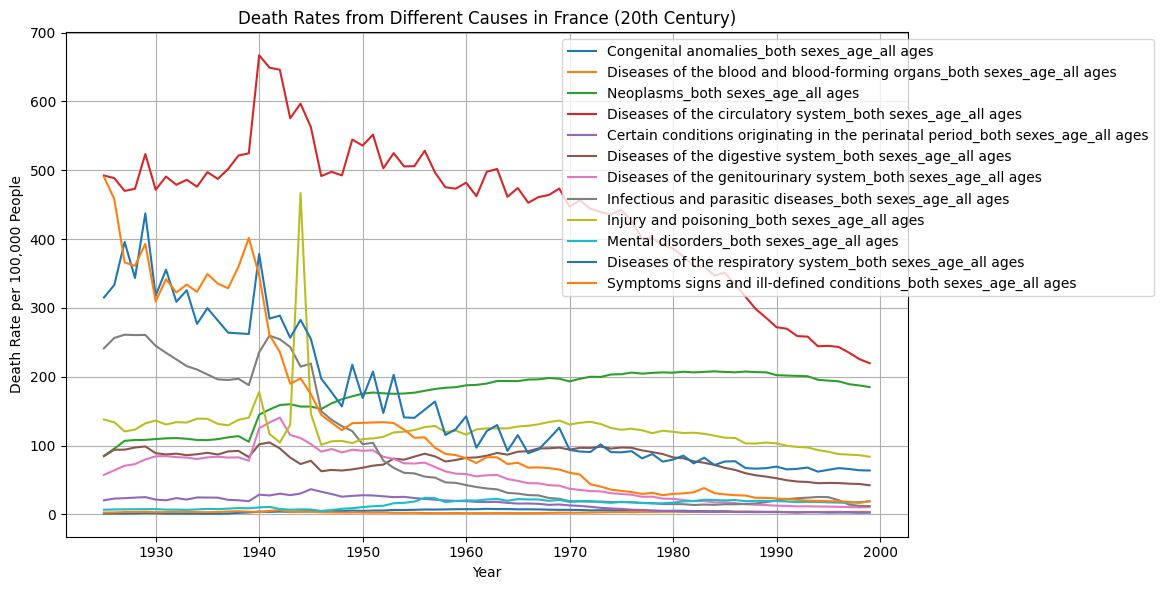

In [20]:
# Plot all causes over time
plt.figure(figsize=(12, 6))

# Loop through all columns except 'Year'
for column in df.columns:
    if column != 'Year':  # Exclude 'Year' itself from Y-axis values
        plt.plot(df['Year'], df[column], label=column)

# Customize the chart
plt.title("Death Rates from Different Causes in France (20th Century)")
plt.xlabel("Year")
plt.ylabel("Death Rate per 100,000 People")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))  # Legend placement
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

**Tip — Apply This Technique to Any Time Series Dataset:**

This technique isn’t limited to causes of death. It can be applied to any dataset that tracks multiple variables over time. As long as your data has a column for time (like Year, Month, or Date) and several numeric columns, you can reuse this same approach to uncover trends and comparisons.

For example, you can use this recipe to:

*   Plot changes in climate indicators like temperature, CO₂ levels, or rainfall across a decade
*   Track economic trends such as unemployment, inflation, or GDP over time
*   Compare student outcomes across majors by year
*   Track product sales across categories over different quarters

Once you understand how to structure and loop through the data, this method becomes a go-to tool for visualizing change over time no matter the topic.